In [32]:
#imports

from keras.layers.core import Dense, Activation , Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential 
import lstm, time #these are helper libraries

Date     datetime64[ns]
Close           float64
Days              int64
dtype: object 

        Date        Close  Days
0 2000-01-01  1455.219971     1
1 2000-01-02  1399.420044     2
2 2000-01-03  1402.109985     3
3 2000-01-04  1403.449951     4
4 2000-01-05  1441.469971     5 



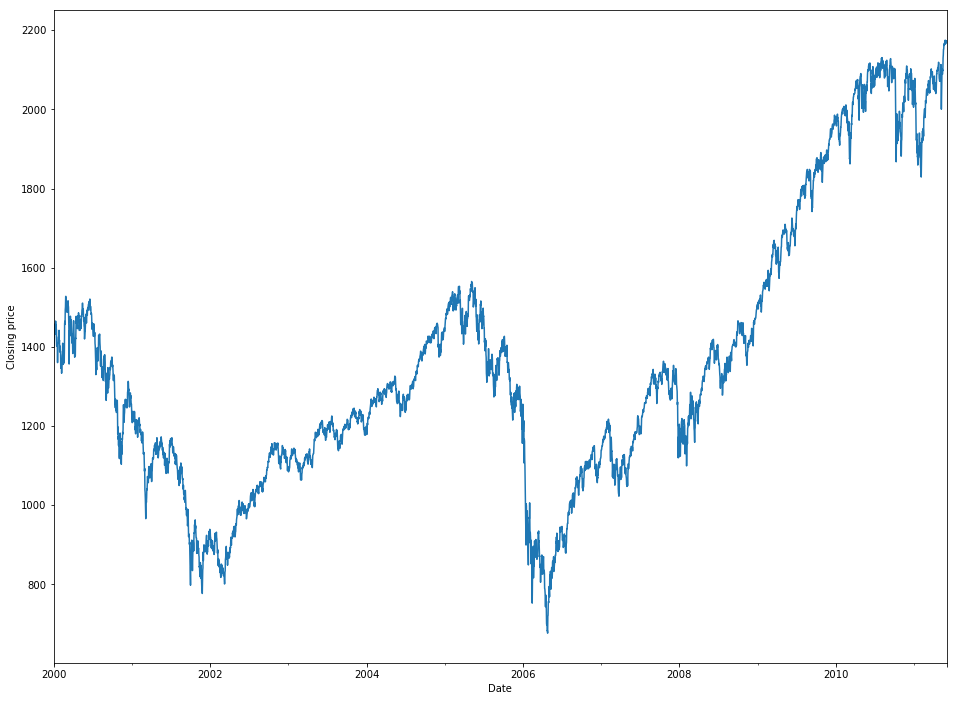

In [38]:
#visualizing dataset 
spy = pd.read_csv('sp500_modified.csv',parse_dates=['Date']) 
print spy.dtypes,'\n'  
print spy.head(),'\n'
spy.set_index('Date',inplace=True)  
spy['Close'].plot(figsize=(16, 12))
plt.ylabel('Closing price')
plt.show()



In [28]:
#step1: Load dataset

#here the data is normalized before it is loaded 

X_train,y_train,X_test,y_test  = lstm.load_data('sp500.csv',50,True)

In [29]:
#step2 : Building model

model = Sequential()

model.add(LSTM(input_dim = 1,output_dim = 50,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(output_dim = 1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss = 'mse' , optimizer = 'rmsprop') #here optimizer is gradient descent named as rmsprop
print 'compilation time :',time.time() - start

compilation time : 0.0188891887665


In [30]:
#step3 : Training the model

model.fit(X_train,y_train,batch_size = 512,nb_epoch = 1,validation_split = 0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 10s - loss: 0.0024 - val_loss: 8.1518e-04


yo


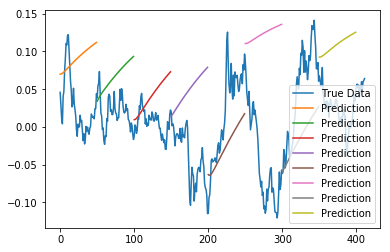

In [31]:
#step4 : predicting on test data and plotting the predictions

predictions = lstm.predict_sequences_multiple(model,X_test,50,50)
lstm.plot_results_multiple(predictions,y_test,50)

In [ ]:
#as we can see that more model's predicitons matches the actual value pretty well